=== Problem 1: Social Network Friend Suggestion (BFS) ===


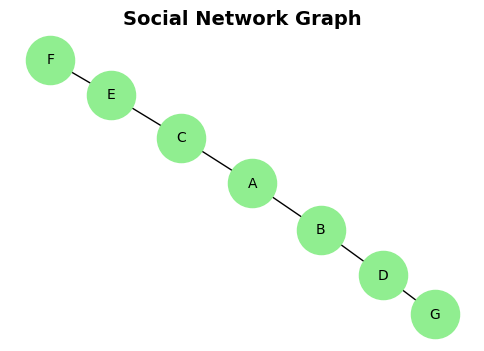

Execution Time: 0.201845 seconds
Memory Used: 0.003906 MiB

Suggested friends for A: {'D', 'E'}
------------------------------------------------------------

=== Problem 2: Route Finding (Bellman-Ford) ===


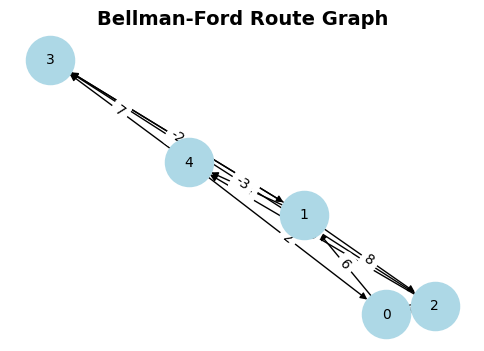

Execution Time: 0.204753 seconds
Memory Used: 0.011719 MiB

Shortest distances from source 0: {0: 0, 1: 2, 2: 7, 3: 4, 4: -2}
------------------------------------------------------------

=== Problem 3: Emergency Response System (Dijkstra) ===


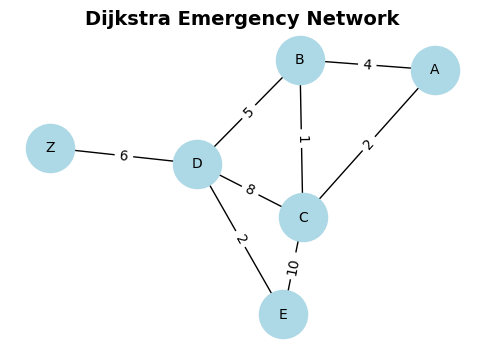

Execution Time: 0.204602 seconds
Memory Used: 0.000000 MiB

Shortest distances from A: {'A': 0, 'B': 3, 'C': 2, 'D': 8, 'E': 10, 'Z': 14}
------------------------------------------------------------

=== Problem 4: Network Cable Installation (Prim's MST) ===


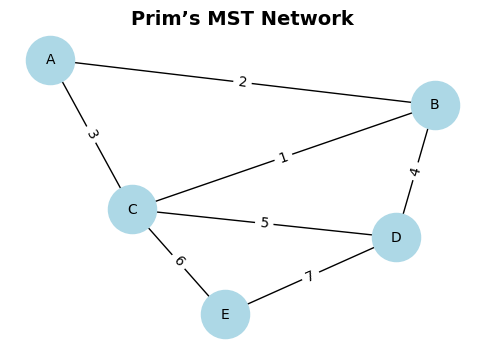

Execution Time: 0.202141 seconds
Memory Used: 0.000000 MiB

Total Minimum Cable Cost: 13
Edges in MST:
('A', 'B', 2)
('A', 'C', 3)
('B', 'C', 1)
('B', 'D', 4)
('C', 'D', 5)
('C', 'E', 6)
('D', 'E', 7)
------------------------------------------------------------

=== Final Summary Table ===
                         Problem Graph Algorithm Time Complexity Application Domain                                      Objective
Social Network Friend Suggestion             BFS        O(V + E)       Social Media                         Suggest mutual friends
    Route Finding on Google Maps    Bellman-Ford        O(V * E)         Navigation Find shortest path (supports negative weights)
       Emergency Response System        Dijkstra      O(E log V)  Disaster Response            Fastest route with positive weights
      Network Cable Installation      Prim's MST      O(E log V)     Infrastructure                  Minimum cable cost connection


In [5]:
# ==========================================================
# Title: Solving Real-World Problems Using Graph Algorithms
# ==========================================================

import time
from memory_profiler import memory_usage
import heapq
from collections import defaultdict, deque
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# ==========================================================
# Utility: Profiling Function
# ==========================================================
def profile_function(func, *args):
    """Measure execution time and memory usage of a function"""
    start_time = time.time()
    mem_before = memory_usage()[0]
    result = func(*args)
    mem_after = memory_usage()[0]
    end_time = time.time()

    print(f"Execution Time: {end_time - start_time:.6f} seconds")
    print(f"Memory Used: {mem_after - mem_before:.6f} MiB\n")
    return result


# ==========================================================
# Function to Draw Graph (for visualization)
# ==========================================================
def draw_graph(edges, directed=False, weighted=False, title="Graph Visualization"):
    G = nx.DiGraph() if directed else nx.Graph()
    if weighted:
        for u, v, w in edges:
            G.add_edge(u, v, weight=w)
    else:
        for u, v in edges:
            G.add_edge(u, v)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(6, 4))
    plt.title(title, fontsize=14, fontweight='bold')

    if weighted:
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1200, font_size=10)
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    else:
        nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1200, font_size=10)

    plt.show()


# ==========================================================
# Problem 1: Social Network Friend Suggestion (BFS)
# ==========================================================
class SocialNetwork:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_connection(self, user1, user2):
        self.graph[user1].append(user2)
        self.graph[user2].append(user1)

    def suggest_friends(self, user):
        visited = set()
        queue = deque([user])
        visited.add(user)
        level = {user: 0}
        suggestions = set()

        while queue:
            current = queue.popleft()
            for neighbor in self.graph[current]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    level[neighbor] = level[current] + 1
                    queue.append(neighbor)
                    if level[neighbor] == 2:
                        if neighbor not in self.graph[user]:
                            suggestions.add(neighbor)
        return suggestions


print("=== Problem 1: Social Network Friend Suggestion (BFS) ===")
sn = SocialNetwork()
connections = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'E'), ('E', 'F'), ('D', 'G')]
for u, v in connections:
    sn.add_connection(u, v)

draw_graph(connections, directed=False, title="Social Network Graph")
profile_function(sn.suggest_friends, 'A')
print(f"Suggested friends for A: {sn.suggest_friends('A')}")
print("-" * 60)


# ==========================================================
# Problem 2: Route Finding (Bellman-Ford)
# ==========================================================
class BellmanFordGraph:
    def __init__(self, vertices):
        self.V = vertices
        self.edges = []

    def add_edge(self, u, v, w):
        self.edges.append((u, v, w))

    def bellman_ford(self, src):
        dist = {v: float('inf') for v in range(self.V)}
        dist[src] = 0

        for _ in range(self.V - 1):
            for u, v, w in self.edges:
                if dist[u] != float('inf') and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w

        for u, v, w in self.edges:
            if dist[u] != float('inf') and dist[u] + w < dist[v]:
                print("Graph contains negative weight cycle!")
                return None
        return dist


print("\n=== Problem 2: Route Finding (Bellman-Ford) ===")
g = BellmanFordGraph(5)
edges = [
    (0, 1, 6), (0, 2, 7), (1, 2, 8), (1, 3, 5),
    (1, 4, -4), (2, 3, -3), (2, 4, 9), (3, 1, -2),
    (4, 0, 2), (4, 3, 7)
]
for u, v, w in edges:
    g.add_edge(u, v, w)

draw_graph(edges, directed=True, weighted=True, title="Bellman-Ford Route Graph")
result = profile_function(g.bellman_ford, 0)
if result:
    print(f"Shortest distances from source 0: {result}")
print("-" * 60)


# ==========================================================
# Problem 3: Emergency Response (Dijkstra)
# ==========================================================
class DijkstraGraph:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_edge(self, u, v, w):
        self.graph[u].append((v, w))
        self.graph[v].append((u, w))

    def dijkstra(self, src):
        pq = [(0, src)]
        dist = defaultdict(lambda: float('inf'))
        dist[src] = 0

        while pq:
            d, node = heapq.heappop(pq)
            if d > dist[node]:
                continue
            for neighbor, weight in self.graph[node]:
                new_dist = d + weight
                if new_dist < dist[neighbor]:
                    dist[neighbor] = new_dist
                    heapq.heappush(pq, (new_dist, neighbor))
        return dist


print("\n=== Problem 3: Emergency Response System (Dijkstra) ===")
dg = DijkstraGraph()
edges = [
    ('A', 'B', 4), ('A', 'C', 2), ('B', 'C', 1),
    ('B', 'D', 5), ('C', 'D', 8), ('C', 'E', 10),
    ('D', 'E', 2), ('D', 'Z', 6)
]
for u, v, w in edges:
    dg.add_edge(u, v, w)

draw_graph(edges, weighted=True, title="Dijkstra Emergency Network")
profile_function(dg.dijkstra, 'A')
print(f"Shortest distances from A: {dict(dg.dijkstra('A'))}")
print("-" * 60)


# ==========================================================
# Problem 4: Network Cable Installation (Prim's MST)
# ==========================================================
class MSTGraph:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_edge(self, u, v, w):
        self.graph[u].append((v, w))
        self.graph[v].append((u, w))

    def prim_mst(self, start):
        visited = set()
        pq = [(0, start)]
        total_cost = 0
        mst_edges = []

        while pq:
            weight, node = heapq.heappop(pq)
            if node in visited:
                continue
            visited.add(node)
            total_cost += weight

            for neighbor, w in self.graph[node]:
                if neighbor not in visited:
                    heapq.heappush(pq, (w, neighbor))
                    mst_edges.append((node, neighbor, w))
        return total_cost, mst_edges


print("\n=== Problem 4: Network Cable Installation (Prim's MST) ===")
mg = MSTGraph()
edges = [
    ('A', 'B', 2), ('A', 'C', 3), ('B', 'C', 1),
    ('B', 'D', 4), ('C', 'D', 5), ('C', 'E', 6),
    ('D', 'E', 7)
]
for u, v, w in edges:
    mg.add_edge(u, v, w)

draw_graph(edges, weighted=True, title="Prim’s MST Network")
profile_function(mg.prim_mst, 'A')
total, mst_edges = mg.prim_mst('A')
print(f"Total Minimum Cable Cost: {total}")
print("Edges in MST:")
for e in mst_edges:
    print(e)
print("-" * 60)


# ==========================================================
# Final Summary Table
# ==========================================================
data = {
    "Problem": [
        "Social Network Friend Suggestion",
        "Route Finding on Google Maps",
        "Emergency Response System",
        "Network Cable Installation"
    ],
    "Graph Algorithm": ["BFS", "Bellman-Ford", "Dijkstra", "Prim's MST"],
    "Time Complexity": ["O(V + E)", "O(V * E)", "O(E log V)", "O(E log V)"],
    "Application Domain": ["Social Media", "Navigation", "Disaster Response", "Infrastructure"],
    "Objective": [
        "Suggest mutual friends",
        "Find shortest path (supports negative weights)",
        "Fastest route with positive weights",
        "Minimum cable cost connection"
    ]
}

summary_df = pd.DataFrame(data)
print("\n=== Final Summary Table ===")
print(summary_df.to_string(index=False))


In [2]:
!pip install memory_profiler